In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\ohtha\Downloads\Electric_Vehicle_Market_India.csv")

In [3]:
df.head()

,Country,Year,Vehicle Class,Category Of Vehicle,Sales Of Motor Vehicles,Parameters,Consumer Category,Energy Sale For Utilities And Non-Utilities
0,India,"Financial Year (Apr - Mar), 2006",Quadricycle,Electric Cars,NaN,PETROL,Public Water Works & Sewage Pumping,NaN
1,India,"Financial Year (Apr - Mar), 2010",Buses,Electric Two Wheelers,NaN,ELECTRIC(BOV),Public Water Works & Sewage Pumping,84919.84
2,India,"Financial Year (Apr - Mar), 2001",Quadricycle,Electric Cars,NaN,DIESEL,Public Water Works & Sewage Pumping,NaN
3,India,"Financial Year (Apr - Mar), 2009",Quadricycle,Electric Two Wheelers,NaN,DIESEL/HYBRID,Domestic,3830.80
4,India,"Financial Year (Apr - Mar), 2002",Buses,Motorcycles,2673046.0,CNG ONLY,Commercial,96906.88


In [4]:

df.describe() 


,Sales Of Motor Vehicles,Energy Sale For Utilities And Non-Utilities
count,1.315000e+03,1733.000000
mean,5.048871e+06,30036.884714
std,2.843420e+06,31443.113527
min,1.319600e+04,10.310000
25%,2.604138e+06,4850.540000
50%,5.016034e+06,10508.690000
75%,7.432460e+06,56001.620000
max,9.992394e+06,99851.280000


In [5]:
print(df.shape)



(2580, 8)


In [6]:
print(df.columns)

Index(['Country', 'Year', 'Vehicle Class', 'Category Of Vehicle',
       'Sales Of Motor Vehicles', 'Parameters', 'Consumer Category',
       'Energy Sale For Utilities And Non-Utilities'],
      dtype='object')


In [7]:
print(df.dtypes)

Country                                         object
Year                                            object
Vehicle Class                                   object
Category Of Vehicle                             object
Sales Of Motor Vehicles                        float64
Parameters                                      object
Consumer Category                               object
Energy Sale For Utilities And Non-Utilities    float64
dtype: object


Checking null values

In [8]:
df.isnull().sum()

Country                                           0
Year                                              0
Vehicle Class                                     0
Category Of Vehicle                               0
Sales Of Motor Vehicles                        1265
Parameters                                        0
Consumer Category                                 0
Energy Sale For Utilities And Non-Utilities     847
dtype: int64

Handling Missing Data You may want to handle missing values by filling them, removing rows, or imputing with a default value.

In [9]:
df["Sales Of Motor Vehicles"].fillna(df["Sales Of Motor Vehicles"].mean(), inplace=True)
df["Energy Sale For Utilities And Non-Utilities"].fillna(df["Energy Sale For Utilities And Non-Utilities"].mean(), inplace=True)


In [10]:
print(df.isnull().sum())

Country                                        0
Year                                           0
Vehicle Class                                  0
Category Of Vehicle                            0
Sales Of Motor Vehicles                        0
Parameters                                     0
Consumer Category                              0
Energy Sale For Utilities And Non-Utilities    0
dtype: int64


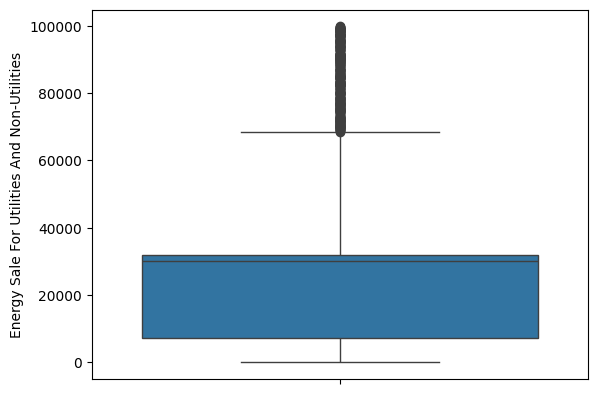

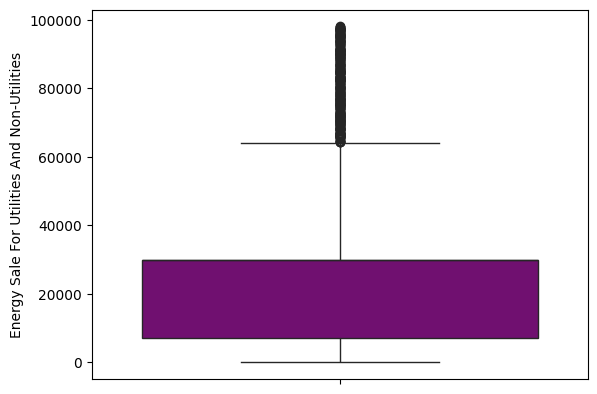

In [11]:
sns.boxplot(df["Energy Sale For Utilities And Non-Utilities"])
plt.show()
upper_limit = df["Energy Sale For Utilities And Non-Utilities"].quantile(0.99)
df = df[df["Energy Sale For Utilities And Non-Utilities"] <= upper_limit]
sns.boxplot(df["Energy Sale For Utilities And Non-Utilities"], color="purple")
plt.show()


Handle Outliers

Descriptive Analysis

Sales trends by year

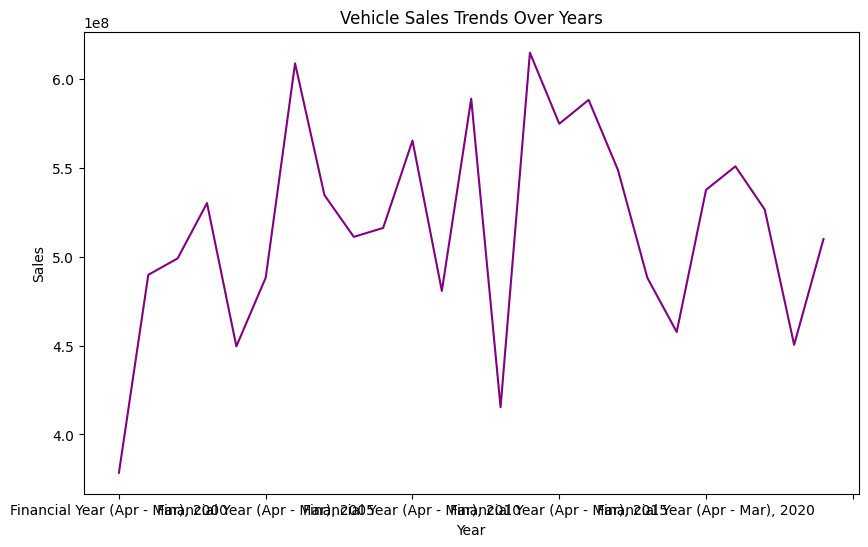

In [12]:
sales_by_year = df.groupby("Year")["Sales Of Motor Vehicles"].sum()
sales_by_year.plot(kind="line", figsize=(10, 6), title="Vehicle Sales Trends Over Years", color="purple")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


Total Sales Analysis

In [13]:
total_sales_parameters = df.groupby("Parameters")["Sales Of Motor Vehicles"].sum()
total_sales_vehicle_class = df.groupby("Vehicle Class")["Sales Of Motor Vehicles"].sum()


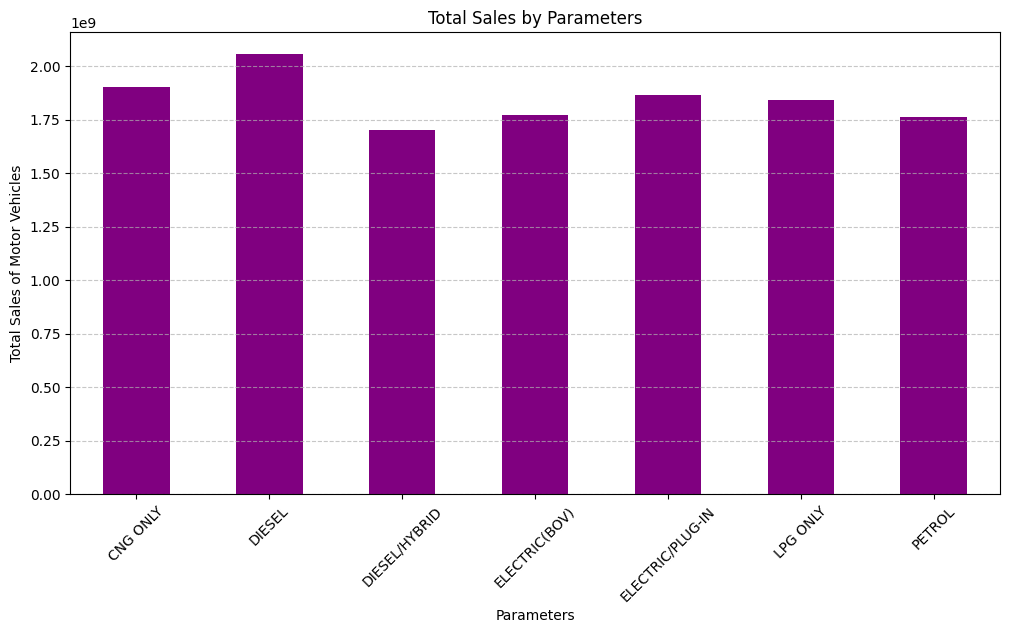

In [14]:
plt.figure(figsize=(12, 6))
total_sales_parameters.plot(kind="bar", color="purple", title="Total Sales by Parameters")
plt.xlabel("Parameters")
plt.ylabel("Total Sales of Motor Vehicles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Market Share by Parameters

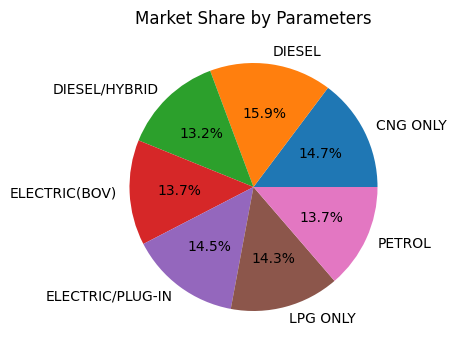

In [15]:

market_share = (df.groupby("Parameters")["Sales Of Motor Vehicles"].sum() / 
                df["Sales Of Motor Vehicles"].sum()) * 100

# Pie chart
market_share.plot(kind="pie", autopct="%1.1f%%", figsize=(4, 8), title="Market Share by Parameters")
plt.ylabel("")  # Remove y-axis label
plt.show()


Sales by Country


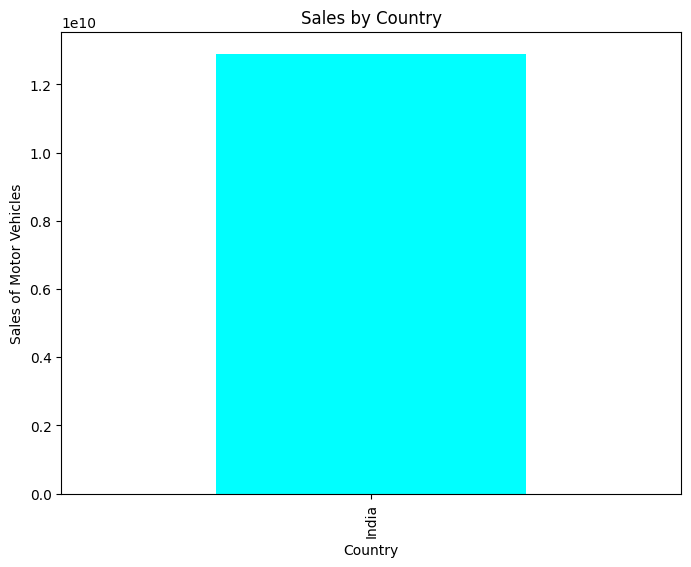

In [16]:
country_sales = df.groupby("Country")["Sales Of Motor Vehicles"].sum()
country_sales.plot(kind="bar", figsize=(8, 6), color="cyan", title="Sales by Country")
plt.xlabel("Country")
plt.ylabel("Sales of Motor Vehicles")
plt.show()


Distribution of Energy Sales

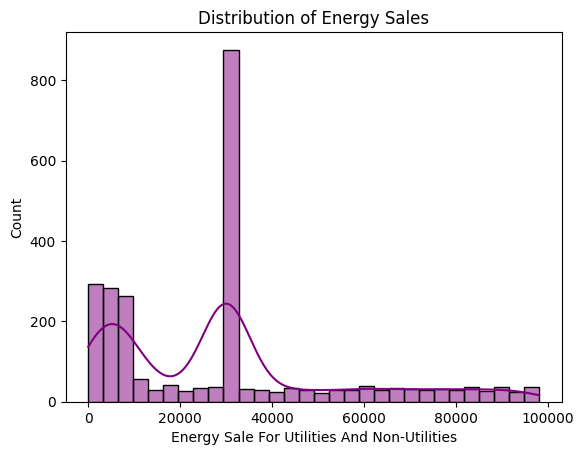

In [17]:
sns.histplot(df["Energy Sale For Utilities And Non-Utilities"], kde=True,color="purple")
plt.title("Distribution of Energy Sales")
plt.show()

Segmentation Analysis

1.Vehicle Class

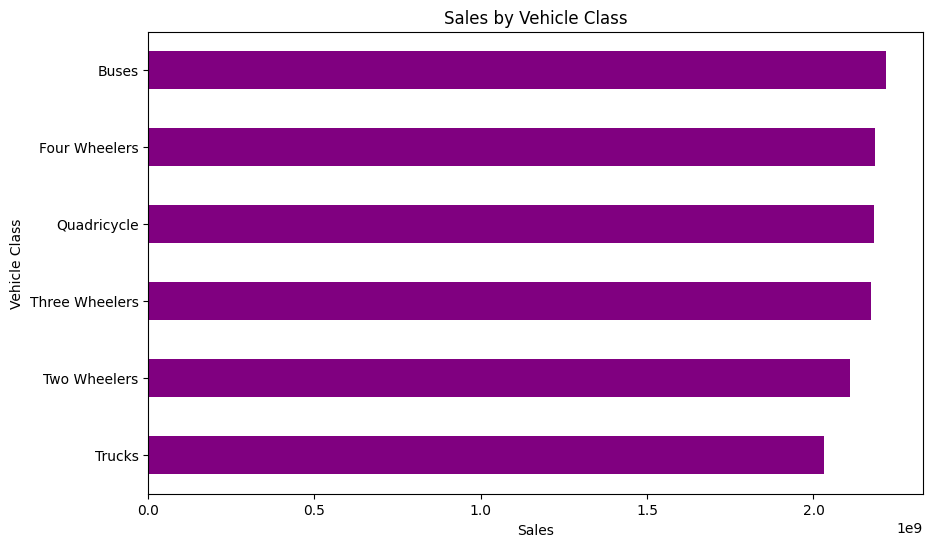

In [18]:
vehicle_sales = df.groupby("Vehicle Class")["Sales Of Motor Vehicles"].sum().sort_values()
vehicle_sales.plot(kind="barh", figsize=(10, 6), title="Sales by Vehicle Class",color="purple")
plt.xlabel("Sales")
plt.ylabel("Vehicle Class")
plt.show()

2.Consumer Category

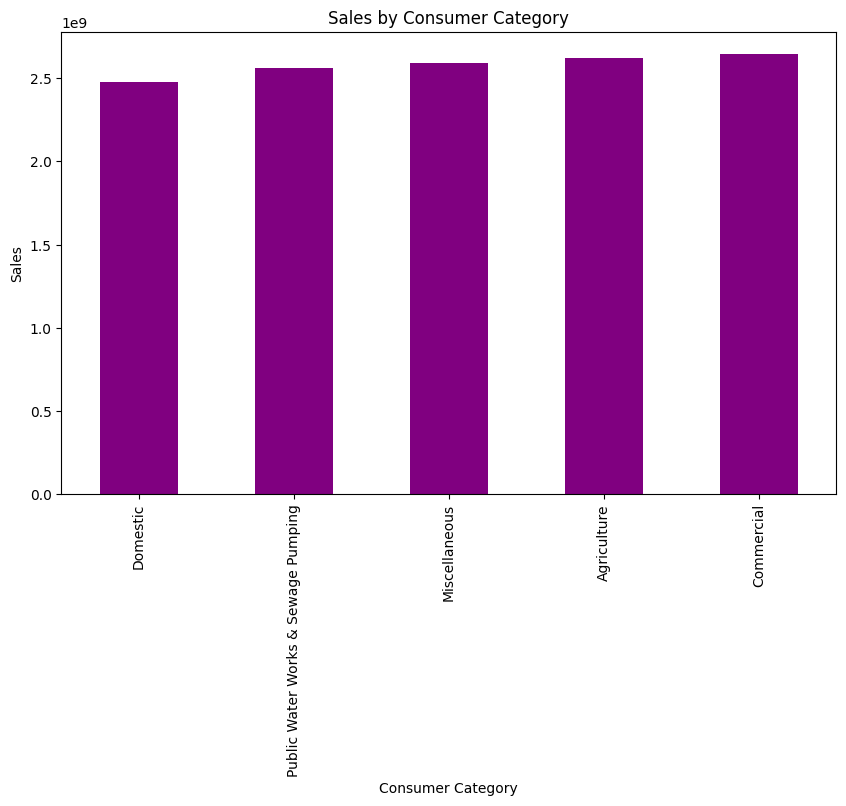

In [19]:
consumer_sales = df.groupby("Consumer Category")["Sales Of Motor Vehicles"].sum().sort_values()
consumer_sales.plot(kind="bar", figsize=(10, 6), title="Sales by Consumer Category",color="purple")
plt.ylabel("Sales")
plt.show()

3.Correlation Analysis

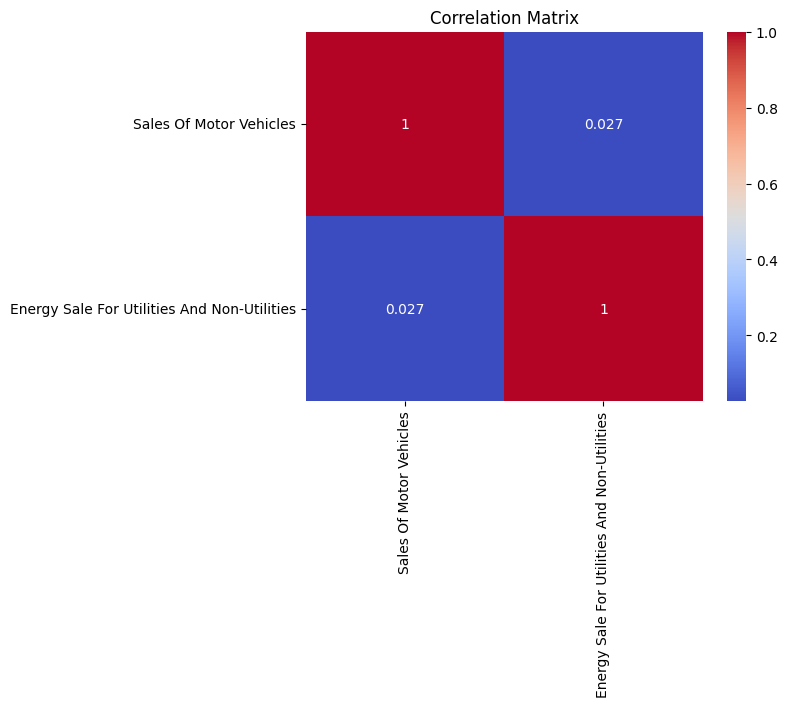

In [20]:
correlation_matrix = df[["Sales Of Motor Vehicles", "Energy Sale For Utilities And Non-Utilities"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Predictive Analysis 

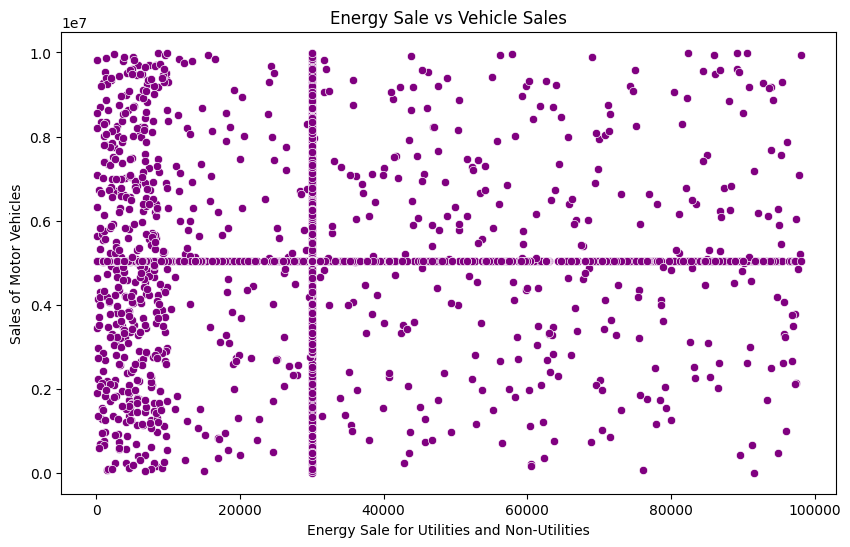

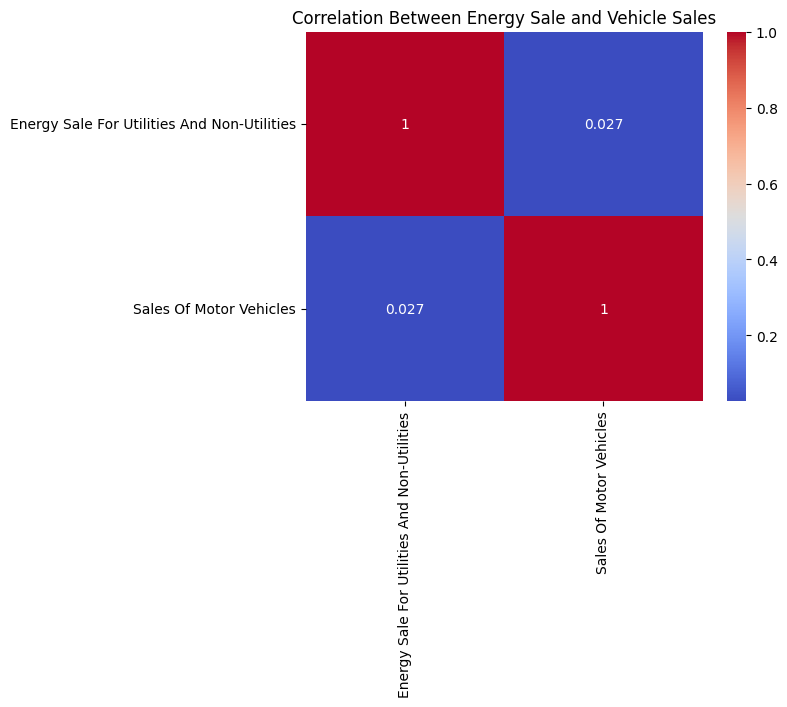

In [21]:
# Scatter plot to compare energy sales vs vehicle sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Energy Sale For Utilities And Non-Utilities"], y=df["Sales Of Motor Vehicles"], color="purple")
plt.title("Energy Sale vs Vehicle Sales")
plt.xlabel("Energy Sale for Utilities and Non-Utilities")
plt.ylabel("Sales of Motor Vehicles")
plt.show()

# Correlation matrix
correlation_matrix = df[["Energy Sale For Utilities And Non-Utilities", "Sales Of Motor Vehicles"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Energy Sale and Vehicle Sales")
plt.show()


Sales Performance Across Vehicle Classes and Parameters

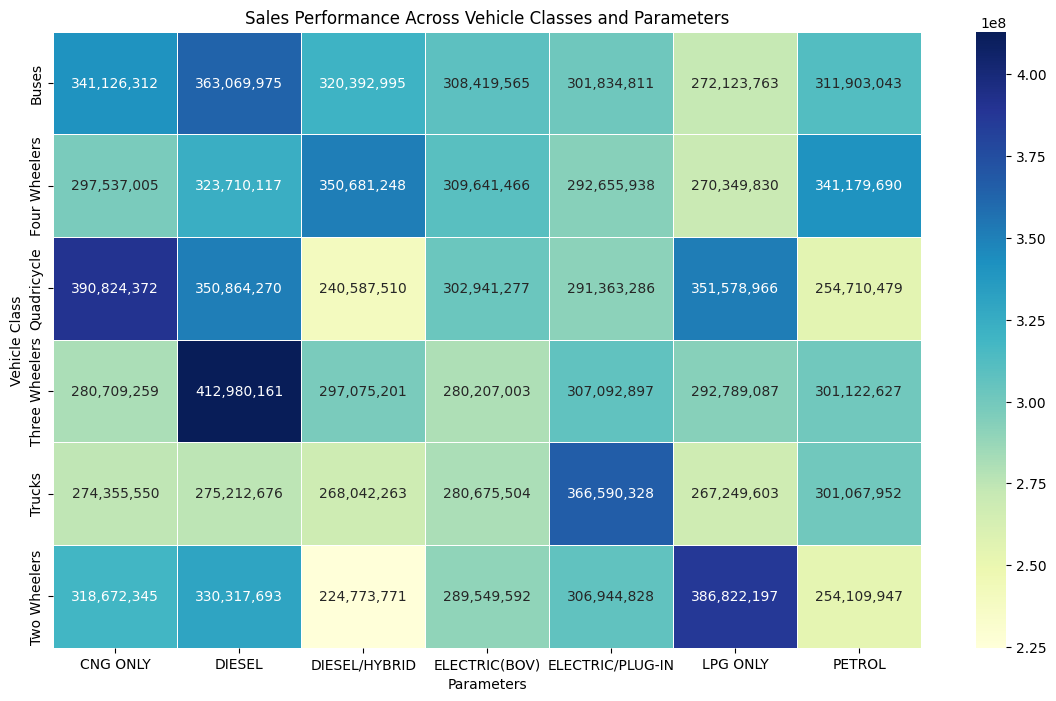

In [22]:
sales_by_vehicle_class_params = df.groupby(["Vehicle Class", "Parameters"])["Sales Of Motor Vehicles"].sum().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(sales_by_vehicle_class_params, annot=True, fmt=",.0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Sales Performance Across Vehicle Classes and Parameters")
plt.xlabel("Parameters")
plt.ylabel("Vehicle Class")
plt.show()


Parameters and Consumer Category

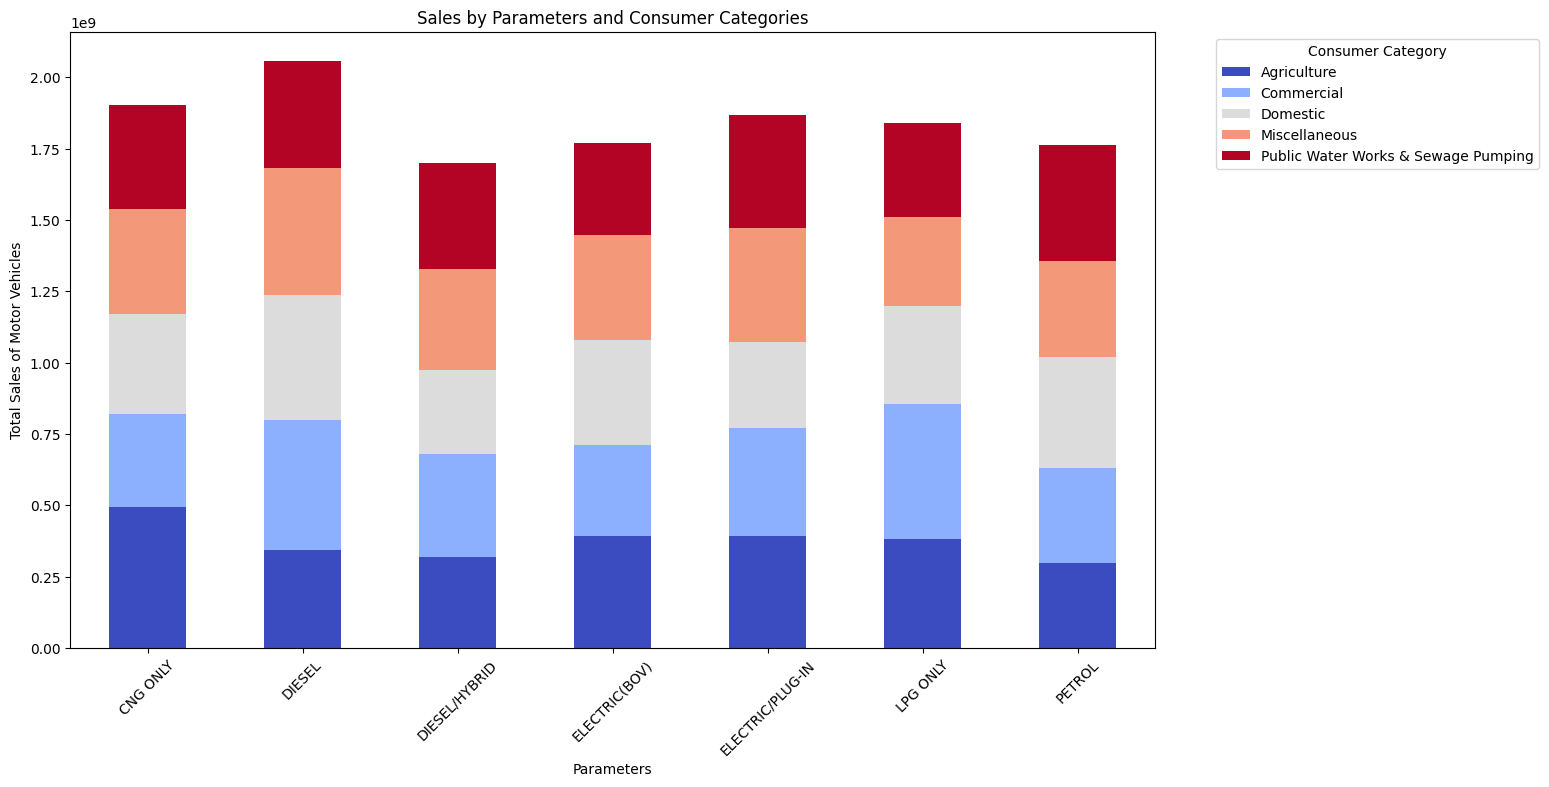

In [23]:
sales_by_params_consumer = df.groupby(["Parameters", "Consumer Category"])["Sales Of Motor Vehicles"].sum().unstack()
sales_by_params_consumer.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="coolwarm", title="Sales by Parameters and Consumer Categories")
plt.xlabel("Parameters")
plt.ylabel("Total Sales of Motor Vehicles")
plt.xticks(rotation=45)
plt.legend(title="Consumer Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Top 5 Performing Parameters

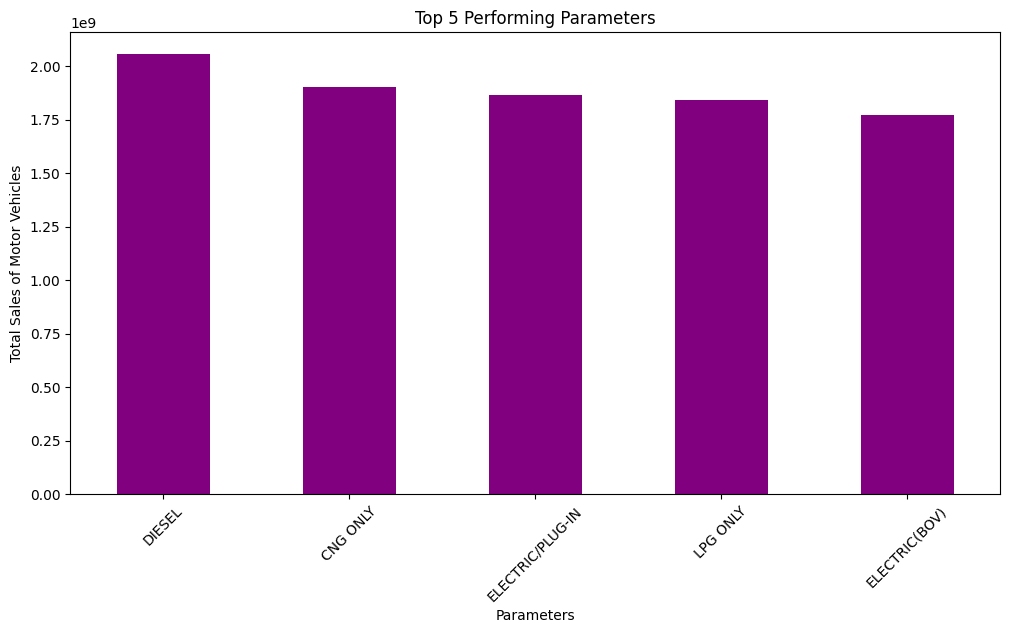

In [24]:
top_5_parameters = total_sales_parameters.sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
top_5_parameters.plot(kind="bar", color="purple", title="Top 5 Performing Parameters")
plt.xlabel("Parameters")
plt.ylabel("Total Sales of Motor Vehicles")
plt.xticks(rotation=45)
plt.show()


Market Share by Year

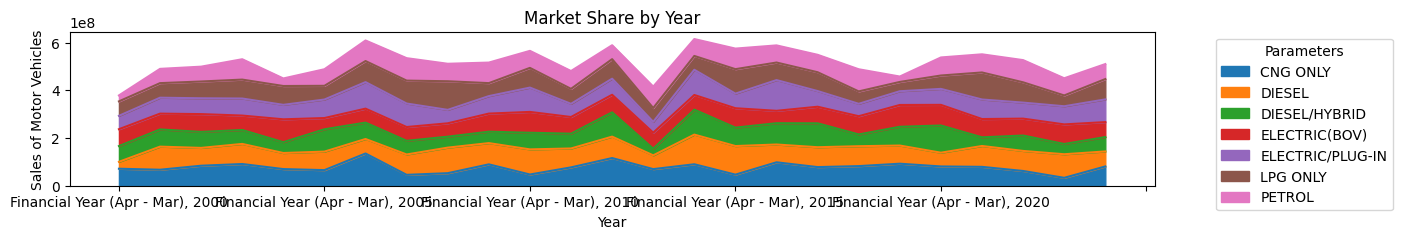

In [25]:
sales_by_year_param = df.groupby(["Year", "Parameters"])["Sales Of Motor Vehicles"].sum().unstack()
sales_by_year_param.plot(kind="area", figsize=(14, 2), stacked=True, title="Market Share by Year")
plt.xlabel("Year")
plt.ylabel("Sales of Motor Vehicles")
plt.legend(title="Parameters", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



Segment Extraction Using K-Means Clustering

In [26]:
label_encoders = {}
for column in ['Vehicle Class', 'Category Of Vehicle', 'Parameters', 'Consumer Category']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [27]:
features = ['Sales Of Motor Vehicles', 'Energy Sale For Utilities And Non-Utilities', 
            'Vehicle Class', 'Category Of Vehicle', 'Parameters', 'Consumer Category']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42) 
df['Cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
print(df[['Country', 'Year', 'Cluster']].head())


  Country                              Year  Cluster
0   India  Financial Year (Apr - Mar), 2006        3
1   India  Financial Year (Apr - Mar), 2010        2
2   India  Financial Year (Apr - Mar), 2001        1
3   India  Financial Year (Apr - Mar), 2009        1
4   India  Financial Year (Apr - Mar), 2002        2


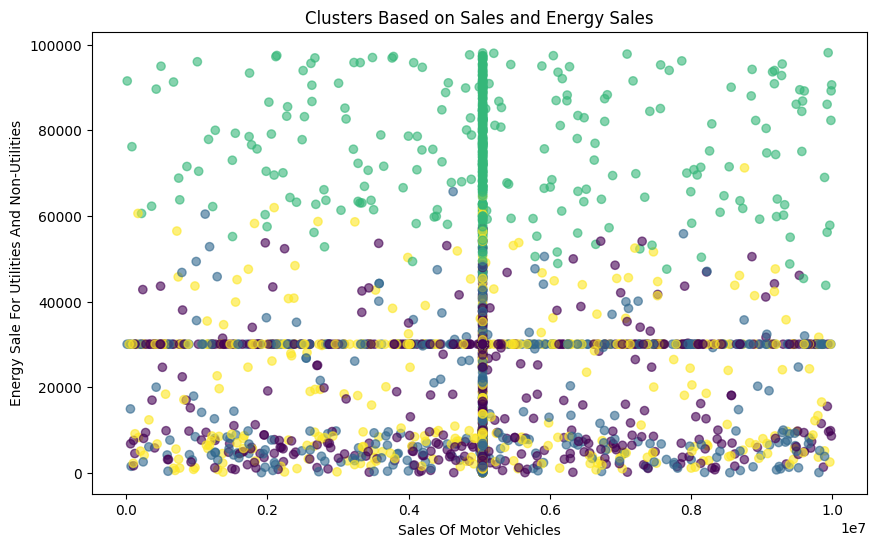

Cluster Centers:  [[-0.0242494  -0.39961723 -0.12341907  1.07295575  0.11000172 -0.23391607]
 [ 0.03068803 -0.37284247  0.08601188 -0.50913171 -1.03378469  0.13450278]
 [ 0.07874321  1.8625274  -0.1129893   0.04849381 -0.10506815 -0.08919426]
 [-0.04778816 -0.32897057  0.11974257 -0.70987354  0.87231771  0.17957459]]


In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales Of Motor Vehicles'], df['Energy Sale For Utilities And Non-Utilities'], 
            c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters Based on Sales and Energy Sales')
plt.xlabel('Sales Of Motor Vehicles')
plt.ylabel('Energy Sale For Utilities And Non-Utilities')
plt.show()

# Optional: Check the cluster centers
print("Cluster Centers: ", kmeans.cluster_centers_)